In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from scipy.special import boxcox, inv_boxcox

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.drop('Id', inplace = True, axis = 1)
test.drop('Id', inplace = True, axis = 1)

In [7]:
target = train['SalePrice']

In [8]:
# train.drop('SalePrice', axis = 1, inplace = True)

In [9]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [10]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

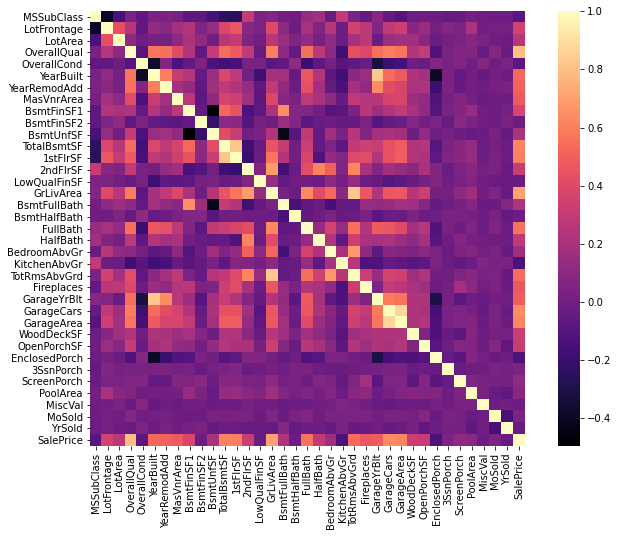

In [11]:
plt.subplots(figsize=(12,8))
sns.heatmap(train.corr(), cmap = 'magma', square=True)

<AxesSubplot:xlabel='SalePrice', ylabel='MiscVal'>

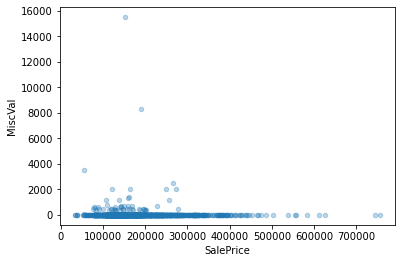

In [12]:
train.plot.scatter('SalePrice', 'MiscVal', alpha = 0.3)

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

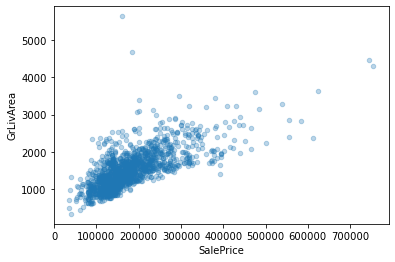

In [13]:
train.plot.scatter('SalePrice', 'GrLivArea', alpha = 0.3)

<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

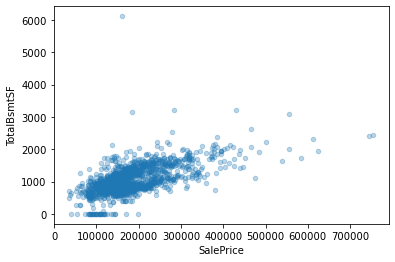

In [14]:
train.plot.scatter('SalePrice', 'TotalBsmtSF', alpha = 0.3)

Skewness: 1.880940746034036 
Kurtosis: 6.509812011089439


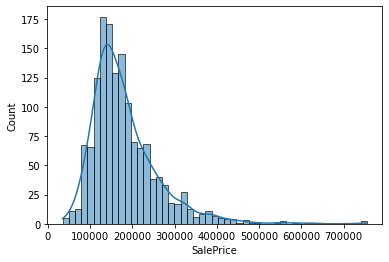

In [15]:
kurt_raw = stats.kurtosis(train['SalePrice'])
skewness_raw = stats.skew(train['SalePrice'])
sns.histplot(data = train, x = 'SalePrice', kde = 'True')
print(f'Skewness: {skewness_raw} \nKurtosis: {kurt_raw}')

In [16]:
# Убираем сильные выбросы
train.drop(train[(train['TotalBsmtSF'] > 4000) & (train['SalePrice'] < 300000)].index, inplace = True)
train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index, inplace = True)
train.drop(train[train['SalePrice'] > 700000].index, inplace = True)

In [17]:
features = pd.concat([train.drop('SalePrice', axis = 1), test])

In [18]:
print("Unique values in each categorical column:")
for col in train.select_dtypes(include=[object]):
    print(col,":", train[col].unique())

Unique values in each categorical column:
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
Alley : [nan 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake'

Анализ целевой

Преобразование целевой. 2 способа:
Box-Cox и Log1p

In [19]:
log1p = np.log1p(train['SalePrice'])
log1p_kurt_raw = round(stats.kurtosis(log1p), 2)
log1p_skewness_raw = round(stats.skew(log1p), 2)
print(f'Skewness: {log1p_skewness_raw} \nKurtosis: {log1p_kurt_raw}')

Skewness: 0.07 
Kurtosis: 0.66


Skewness: -0.0 
Kurtosis: 0.71


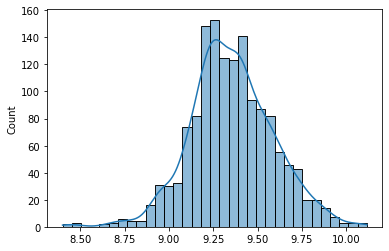

In [20]:
boxcox_target, lmbda  = stats.boxcox(train['SalePrice'])
boxcox_kurt_raw = round(stats.kurtosis(boxcox_target),2)
boxcox_skewness_raw = round(stats.skew(boxcox_target), 2)
sns.histplot(boxcox_target, kde = 'True')
print(f'Skewness: {boxcox_skewness_raw} \nKurtosis: {boxcox_kurt_raw}')
# Для инверсии: scipy.special.inv_boxcox scipy.special.inv_boxcox()

Box-Cox лучше, но не везде

In [21]:
train['SalePrice'] = boxcox_target

Fill NA

In [22]:
missed = {}
for col in train.columns:
    if train[col].isnull().any():
        missed.update({col: [round(train[col].isnull().sum()/len(train)*100,2), train[col].dtype]})
sorted(missed.items(), key = lambda x: x[1], reverse=True)

[('PoolQC', [99.66, dtype('O')]),
 ('MiscFeature', [96.29, dtype('O')]),
 ('Alley', [93.75, dtype('O')]),
 ('Fence', [80.77, dtype('O')]),
 ('FireplaceQu', [47.39, dtype('O')]),
 ('LotFrontage', [17.79, dtype('float64')]),
 ('GarageType', [5.56, dtype('O')]),
 ('GarageFinish', [5.56, dtype('O')]),
 ('GarageQual', [5.56, dtype('O')]),
 ('GarageCond', [5.56, dtype('O')]),
 ('GarageYrBlt', [5.56, dtype('float64')]),
 ('BsmtExposure', [2.61, dtype('O')]),
 ('BsmtFinType2', [2.61, dtype('O')]),
 ('BsmtQual', [2.54, dtype('O')]),
 ('BsmtCond', [2.54, dtype('O')]),
 ('BsmtFinType1', [2.54, dtype('O')]),
 ('MasVnrType', [0.55, dtype('O')]),
 ('MasVnrArea', [0.55, dtype('float64')]),
 ('Electrical', [0.07, dtype('O')])]

String fill NA

In [23]:
fill_none_strs = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                  'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType',
                  ]
fill_mod_strs = ['MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 
                 'SaleType' 
                ]
fill_zer_ints = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                'GarageCars', 'GarageArea', 'BsmtUnfSF', 'TotalBsmtSF']
def fill_strs(df):
    for cols in fill_none_strs:
        df[cols] = df[cols].fillna('None')
    for cols in fill_mod_strs:
        df[cols] = df[cols].fillna(df[cols].mode()[0])
    return df
def fill_ints(df):
    for cols in fill_zer_ints:
        df[cols] = df[cols].fillna(0)
    return(df)

In [24]:
train = fill_strs(train)
train = fill_ints(train)

In [25]:
missed = {}
for col in train.columns:
    if train[col].isnull().any():
        missed.update({col: [round(train[col].isnull().sum()/len(train)*100,2), train[col].dtype]})
sorted(missed.items(), key = lambda x: x[1], reverse=True)

[]

In [26]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = features.select_dtypes(numeric_dtypes).columns

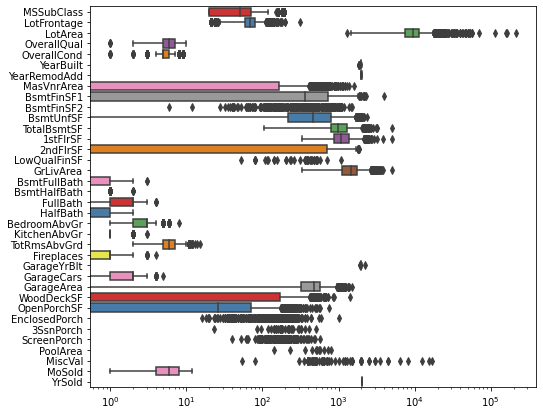

In [27]:
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=features[num_cols] , orient="h", palette="Set1")

In [28]:
skew_d = {}
for col in num_cols:
        if stats.skew(train[col]) > 0.5:
            skew_d.update({col: stats.skew(train[col])})
sorted(skew_d.items(), key = lambda x: x[1], reverse=True)

[('MiscVal', 24.418175107785633),
 ('PoolArea', 17.50455597524574),
 ('LotArea', 12.574589805730213),
 ('3SsnPorch', 10.279261797446228),
 ('LowQualFinSF', 8.98929107000648),
 ('KitchenAbvGr', 4.47674827122727),
 ('BsmtFinSF2', 4.244208669084649),
 ('BsmtHalfBath', 4.124711657079856),
 ('ScreenPorch', 4.111399891388312),
 ('EnclosedPorch', 3.0812750838092096),
 ('MasVnrArea', 2.654760681643214),
 ('OpenPorchSF', 2.3374349270732453),
 ('WoodDeckSF', 1.5496720022224146),
 ('MSSubClass', 1.4049164649299029),
 ('BsmtUnfSF', 0.920808873459641),
 ('1stFlrSF', 0.8661873255069391),
 ('GrLivArea', 0.8343317105860125),
 ('2ndFlrSF', 0.7770647552870847),
 ('BsmtFinSF1', 0.7440879010708922),
 ('OverallCond', 0.6899190896186711),
 ('HalfBath', 0.6835179822253147),
 ('TotRmsAbvGrd', 0.6607348672523655),
 ('Fireplaces', 0.6320255982608534),
 ('BsmtFullBath', 0.5905431106469339)]

In [29]:
# 
def skew_fix(df):
    for col in num_cols:
        # skew fix
#         if stats.skew(df[col]) <= 0.5:
        df[col] = np.log1p(df[col])
    return df

In [30]:
features['HasWoodDeck'] = (features['WoodDeckSF'] == 0) * 1
features['HasOpenPorch'] = (features['OpenPorchSF'] == 0) * 1
features['HasEnclosedPorch'] = (features['EnclosedPorch'] == 0) * 1
features['Has3SsnPorch'] = (features['3SsnPorch'] == 0) * 1
features['HasScreenPorch'] = (features['ScreenPorch'] == 0) * 1
features['YearsSinceRemodel'] = features['YrSold'].astype(int) - features['YearRemodAdd'].astype(int) +1
features['Total_Home_Quality'] = features['OverallQual'] + features['OverallCond']
features = features.drop(['Utilities', 'Street', 'PoolQC'], axis=1)
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features['YrBltAndRemod'] = features[['YearBuilt', 'YearRemodAdd']].apply(lambda x: x['YearBuilt'] if x['YearBuilt'] > x['YearRemodAdd'] else x['YearRemodAdd'], axis = 1)

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])
features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

In [31]:
train = skew_fix(train)

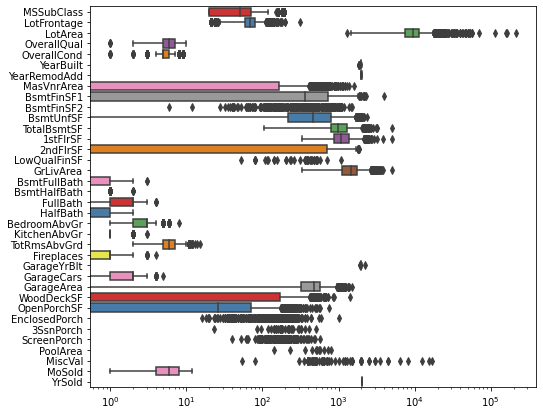

In [32]:
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=features[num_cols] , orient="h", palette="Set1")

Scaling

In [33]:
X_train = train.drop('SalePrice', axis = 1)
Y_train = train['SalePrice']

In [34]:
num_scaler = MinMaxScaler()
cat_enc = OneHotEncoder(drop='first')

In [35]:
cat_df = pd.DataFrame(data = cat_enc.fit_transform(X_train.select_dtypes('object')).toarray(), columns = cat_enc.get_feature_names())

D:\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
num_df = pd.DataFrame(data = num_scaler.fit_transform(X_train.select_dtypes(exclude = 'object')), columns=X_train.select_dtypes(exclude = 'object').columns)

In [37]:
X_train = pd.concat([cat_df, num_df], axis = 1)

In [38]:
num_df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.483003     0.728713  0.366271     0.813196     0.682606   0.950951   
1    0.000000     0.764333  0.391245     0.734867     0.934536   0.760143   
2    0.483003     0.736444  0.422289     0.813196     0.682606   0.936906   
3    0.551764     0.715010  0.390223     0.813196     0.682606   0.319286   
4    0.483003     0.772717  0.468694     0.882287     0.682606   0.929878   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0      0.884882    0.716038    0.853057         0.0  ...    0.871552   
1      0.437057    0.000000    0.895378         0.0  ...    0.847414   
2      0.868404    0.690361    0.804590         0.0  ...    0.885882   
3      0.336710    0.000000    0.699487         0.0  ...    0.893388   
4      0.835423    0.794318    0.843322         0.0  ...    0.929819   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0    0.000000     0.654449       0.000000        0.0          0.0       0.0   
1    0.843935     0.000000       0.000000        0.0          0.0       0.0   
2    0.000000     0.596422       0.000000        0.0          0.0       0.0   
3    0.000000     0.568247       0.888227        0.0          0.0       0.0   
4    0.779126     0.704481       0.000000        0.0          0.0       0.0   

   MiscVal    MoSold    YrSold  
0      0.0  0.216618  0.500249  
1      0.0  0.586928  0.250187  
2      0.0  0.859833  0.500249  
3      0.0  0.216618  0.000000  
4      0.0  1.000000  0.500249  

[5 rows x 36 columns]

Modelling

In [39]:
from sklearn.metrics import classification_report

In [40]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, cross_val_score

In [41]:
# Setup cross validation folds
kf = KFold(n_splits=4, random_state=777, shuffle=True)

In [42]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=777)

In [43]:
# lightgbm.fit(X_train, Y_train)

Обработка test

In [44]:
test = fill_strs(test)
test = fill_ints(test)
test = skew_fix(test)
cat_df_tr = pd.DataFrame(data = cat_enc.transform(test.select_dtypes('object')).toarray(), columns = cat_enc.get_feature_names())
num_df_tr = pd.DataFrame(data = num_scaler.transform(test.select_dtypes(exclude = 'object')), columns=test.select_dtypes(exclude = 'object').columns)
X_test = pd.concat([cat_df_tr, num_df_tr], axis = 1)

D:\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
from sklearn.model_selection import  RandomizedSearchCV

In [50]:
gridParams_lgbm = {
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'num_leaves': np.arange(1,6),
    'num_leaves': np.arange(1,10)
}

In [51]:
lgbm_gs = RandomizedSearchCV(lightgbm, param_distributions=gridParams_lgbm, cv=kf, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=3, random_state=777)
lgbm_fitted = lgbm_gs.fit(X_train, Y_train)
preds_lgbm_gs = inv_boxcox(lgbm_fitted.predict(X_test), lmbda)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


In [57]:
submit = pd.read_csv('test.csv', usecols = [0])
submit['SalePrice'] = preds_lgbm_gs
submit.head()

Id      SalePrice
0  1461  120715.134653
1  1462  152477.881661
2  1463  188473.913423
3  1464  197791.490362
4  1465  191193.847961

In [59]:
submit.to_csv('Twelvth_sub.csv', index = False)

In [56]:
submit

Id      SalePrice
0        0  120715.134653
1        1  152477.881661
2        2  188473.913423
3        3  197791.490362
4        4  191193.847961
...    ...            ...
1454  1454   83496.187553
1455  1455   81806.016194
1456  1456  169411.632277
1457  1457  115531.361121
1458  1458  206398.186136

[1459 rows x 2 columns]